In [1]:
import xmltodict, json, os, re, sys

import scipy.stats as stats

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
https://github.com/ndevisscher/Project/blob/master/disable_autoscroll.py
Extension for disabling autoscrolling long output, which is super annoying sometimes
Usage:
    %load_ext disable_autoscroll
You can also put the js snippet below in profile_dir/static/js/custom.js
"""

from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def load_ipython_extension(ip):
    display(Javascript(disable_js))

In [3]:
os.chdir('/home/vvs/Documents/Telegram clustering')

In [4]:
f_in = open('./data/processed/chinadataset/new_test_spect_ru.json')

inp = f_in.readline()
data = json.loads(inp)
data[0]['edus']
eng_w = 0 
counter_l = 0 
data_words = []
data_edus = []

symbols = re.compile(r'[\/:\-\*\.)\(\)]')
smiles_count = 0
for dialog in data:
    data_edus.append(len(dialog['edus']))
    for line in dialog['edus']:
        data_words.append(len(line['text'].split()))
        if symbols.match(line['text']) :
            if (len(line['text']) <5):
                smiles_count +=1
print(f'Относительное количество коротких символьных сообщений: {smiles_count/sum(data_edus)}')
        


Относительное количество коротких символьных сообщений: 0.01124567474048443


 ## Проверка : относятся ли тестовая и тренировочная выборки к одному распределению

 ### Визуальный анализ гистограмм

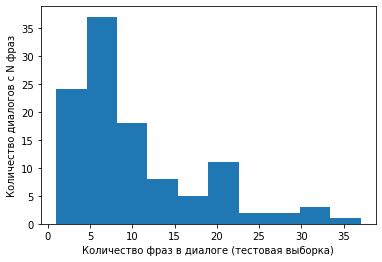

In [5]:

plt.hist(data_edus,  bins=10)
plt.ylabel('Количество диалогов с N фраз')
plt.xlabel('Количество фраз в диалоге (тестовая выборка)') 
plt.show()

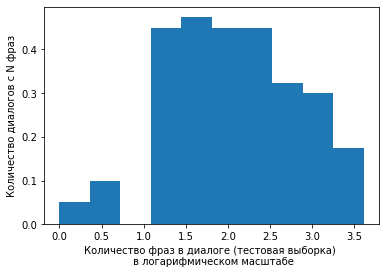

In [6]:

plt.hist(np.log(data_edus), density=True, bins=10)
plt.ylabel('Количество диалогов с N фраз')
plt.xlabel('Количество фраз в диалоге (тестовая выборка) \n в логарифмическом масштабе') 
plt.show()

 #### гистограмма 'Количество фраз в диалоге (тестовая выборка) \n в логарифмическом масштабе' визуально похожа на нормальное распределение

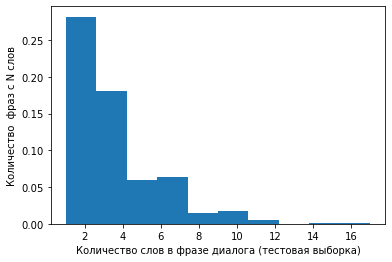

In [7]:

plt.hist(data_words, density=True, bins=10)
plt.ylabel('Количество  фраз с N слов')
plt.xlabel('Количество слов в фразе диалога (тестовая выборка)');  
plt.show()

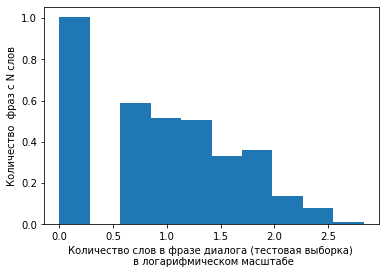

In [8]:

plt.hist(np.log(data_words), density=True, bins=10)
plt.ylabel('Количество  фраз с N слов')
plt.xlabel('Количество слов в фразе диалога (тестовая выборка) \n в логарифмическом масштабе');  
plt.show()

 #### гистограммы 'Количество слов в фразе диалога (тестовая выборка)' ( и в логарифмическом масштабе тоже)  визуально не  похожа на нормальное распределение ( сильное отклонение от колоколооразной формы.

In [9]:
f_in2 = open('./data/processed/chinadataset/train_spect_ru.json')

inp2 = f_in2.readline()
data2 = json.loads(inp2)

eng_w = 0 
counter_l = 0 
data_words2 = []
data_edus2 = []
smiles_count2 =0

symbols = re.compile(r'[\/:\-\*\.)\(\)]')
smiles_count = 0
for dialog in data2:
    data_edus2.append(len(dialog['edus']))
    for line in dialog['edus']:
        data_words2.append(len(line['text'].split()))
        if symbols.match(line['text']) :
            if (len(line['text']) <5):
                smiles_count2 +=1
print(f'Относительное количество коротких символьных сообщений: {smiles_count2/sum(data_edus)}')
        


Относительное количество коротких символьных сообщений: 0.1695501730103806


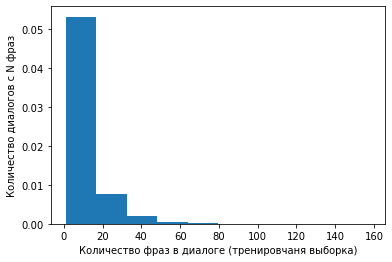

In [10]:

plt.hist(data_edus2, density=True, bins=10)
plt.ylabel('Количество диалогов с N фраз')
plt.xlabel('Количество фраз в диалоге (тренировчаня выборка)') 
plt.show()


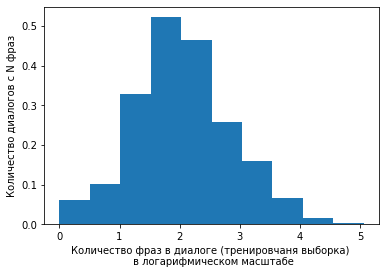

In [11]:

plt.hist(np.log(data_edus2), density=True, bins=10)
plt.ylabel('Количество диалогов с N фраз')
plt.xlabel('Количество фраз в диалоге (тренировчаня выборка) \n в логарифмическом масштабе') 
plt.show()


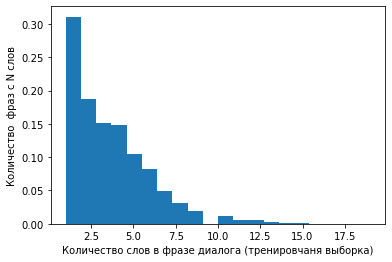

In [12]:

plt.hist(data_words2, density=True, bins=20)
plt.ylabel('Количество  фраз с N слов')
plt.xlabel('Количество слов в фразе диалога (тренировчаня выборка)');  
plt.show()

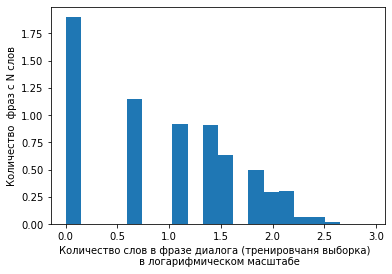

In [13]:

plt.hist(np.log(data_words2), density=True, bins=20)
plt.ylabel('Количество  фраз с N слов')
plt.xlabel('Количество слов в фразе диалога (тренировчаня выборка)  \n в логарифмическом масштабе');  
plt.show()

 #### Так как логарифмированные гистограммы  по 'Количеству фраз в диалоге' похожи на нормальное распределение, применяется Т-тест для двух независимых выборок.

In [14]:

stats.ttest_ind(np.log(data_edus2), np.log(data_edus))

Ttest_indResult(statistic=-0.6734607795376959, pvalue=0.5007844191819955)

 pvalue=0.5, что гораздо больше стандартной альфа ошибки 0.05. **Нельзя отклонить нулевую гипотезу и говорить о статистической занчимости различий тестовой и тренировочной выборок по критерию   'Количество фраз в диалоге'**

 #### Так как ни обычная гистограмма, ни её логарифм не похожи на нормальное распределение по критерию 'Количество слов в фразе диалога', применятеся критерий Манна - Уитни.

In [15]:
stats.ttest_ind(data_words2, data_words)

Ttest_indResult(statistic=1.110780242382404, pvalue=0.266683414965731)

 pvalue=0.26, что гораздо больше стандартной альфа ошибки 0.05. **Нельзя отклонить нулевую гипотезу и говорить о статистической занчимости различий тестовой и тренировочной выборок по критерию   'Количество слов в фразе диалога'**

 ## Исследование распределений связей в диалогах.

 ### Создание тренировочного и тестового датафреймов по типам взаимосвязей

In [16]:
relations_dict_train = {}
for dialog in data2:
    for relation in dialog['relations']:
        if relation['type'] in relations_dict_train.keys():
            relations_dict_train[relation['type']] +=1
        else:
            relations_dict_train[relation['type']] = 1

relations_dict_dialog = dict((el,0) for el in list(relations_dict_train.keys()))    

In [17]:
dict_relations = {}
for idx, dialog in enumerate(data):
    dict_relations[idx] = relations_dict_dialog.copy()
    for relation in dialog['relations']:
        dict_relations[idx][relation['type']] +=1
test_rel_df =  pd.DataFrame.from_dict(dict_relations).T      

In [18]:
dict_relations_train = {}
for idx, dialog in enumerate(data2):
    dict_relations_train[idx] = relations_dict_dialog.copy()
    for relation in dialog['relations']:
        dict_relations_train[idx][relation['type']] +=1
        

In [19]:

train_rel_df =  pd.DataFrame.from_dict(dict_relations_train).T

 ### Исследование на корреляции между взаимосвязями в тренировочной выборке

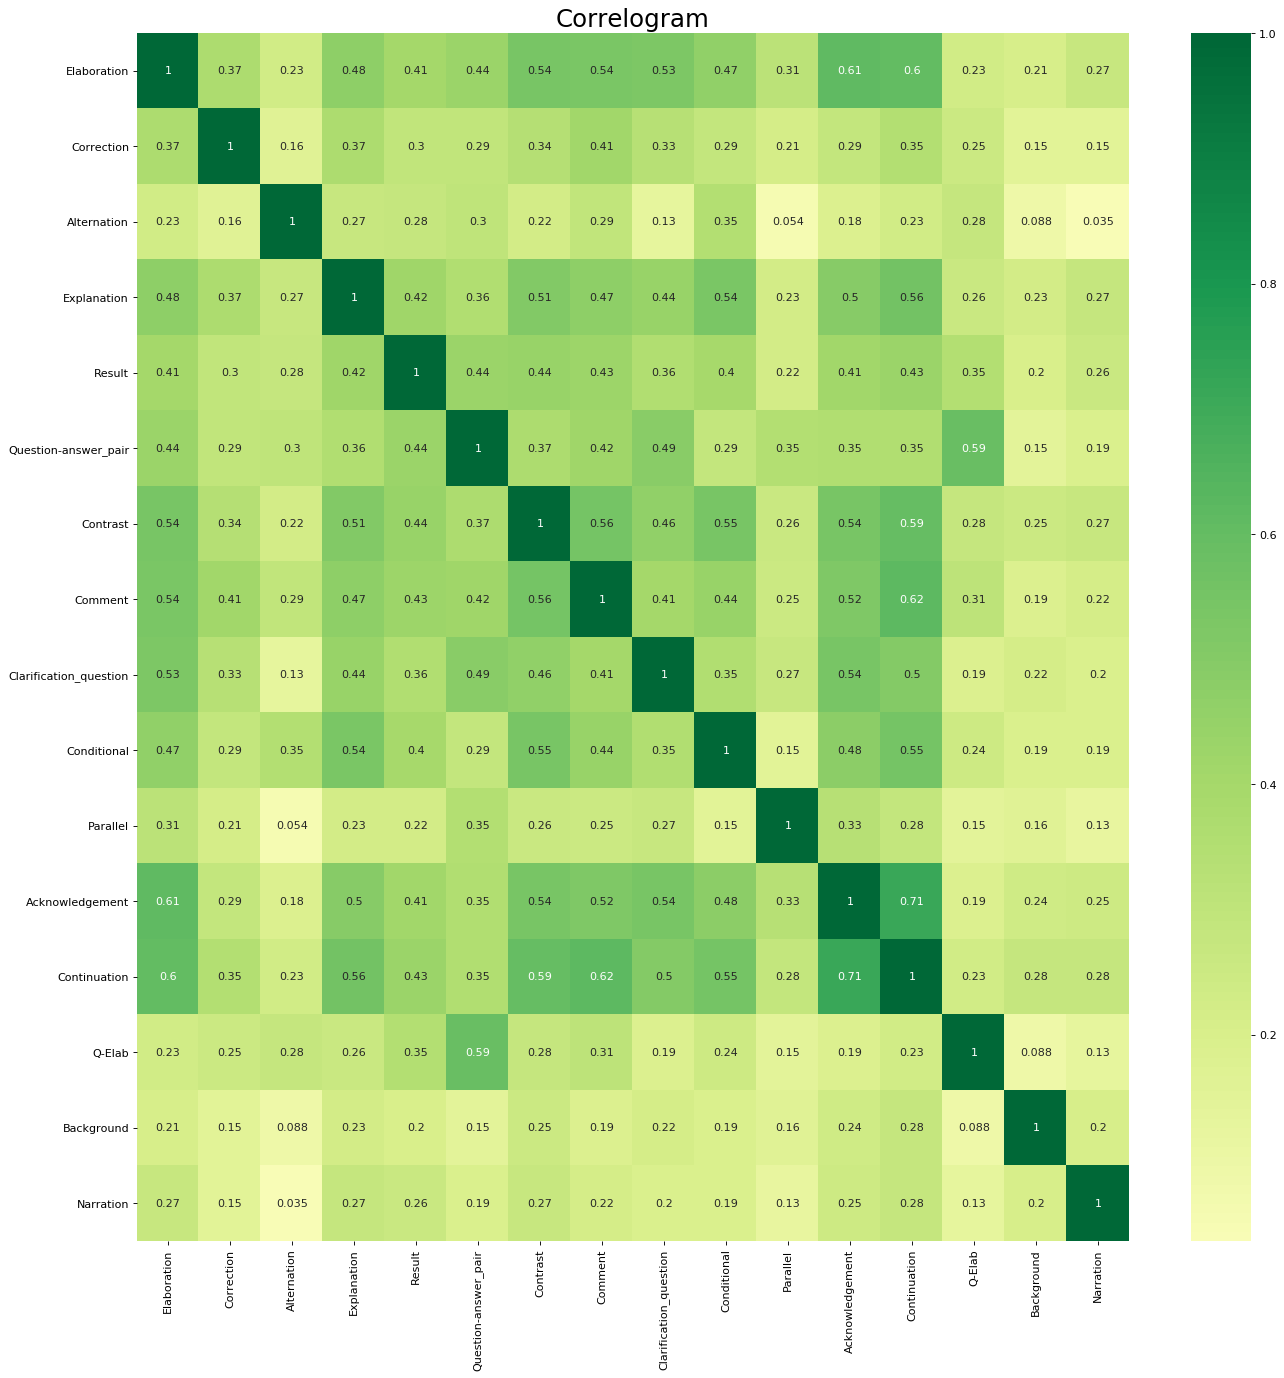

In [23]:
plt.figure(figsize=(20,20), dpi= 80)
ax = sns.heatmap(train_rel_df.corr(), 
                 xticklabels=train_rel_df.corr().columns, 
                 yticklabels=train_rel_df.corr().columns, 
                 cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
res = ax.get_figure()

In [24]:
train_rel_df.corr().columns

Index(['Elaboration', 'Correction', 'Alternation', 'Explanation', 'Result',
       'Question-answer_pair', 'Contrast', 'Comment', 'Clarification_question',
       'Conditional', 'Parallel', 'Acknowledgement', 'Continuation', 'Q-Elab',
       'Background', 'Narration'],
      dtype='object')

#### заметны следующие корреляции (более 0,5):
- 'Acknowledgement' - 'Explanation'
- 'Acknowledgement' - 'Elaboration'
- 'Acknowledgement' - 'Contrast'
- 'Acknowledgement' - 'Comment'
- 'Acknowledgement' - 'Clarification_question'
- 'Acknowledgement' - 'Continuation'
- 'Continuation' - 'Elaboration'
- 'Continuation' - 'Explanation'
- 'Continuation' - 'Contrast'
- 'Continuation' - 'Comment'
- 'Continuation' - 'Clarification_question'
- 'Q-Elab' - 'Question-answer_pair'
- 'Conditional'- 'Explanation'
- 'Conditional'- 'Contrast'
- 'Conditional'- 'Continuation'
- 'Clarification_question' - 'Elaboration'
- 'Contrast' - 'Explanation'
- 'Contrast' - 'Elaboration'

In [21]:
count_nonproj = 0
count_all = 0
for dialog in data:
    for rel in dialog['relations']:
        count_all += 1
#         print(rel['x']-rel['y'])
        if abs(rel['x']-rel['y']) > 1:
            count_nonproj += 1

In [22]:
print(f' относительное количество непроективных связей {count_nonproj/count_all}')

 относительное количество непроективных связей 0.44769503546099293


 ## Проверка на ковариативный сдвиг

In [160]:
#https://habr.com/ru/post/422185/
train_rel_df['is_train'] = 1
test_rel_df['is_train'] = 0

In [161]:
df_combine = pd.concat([train_rel_df, test_rel_df], axis=0, ignore_index=True)


y = df_combine['is_train'].values #индикатор источника 
x = df_combine.drop('is_train', axis=1).values #объединенный датасет

tst, trn = test_rel_df.values, train_rel_df.values

In [162]:


rfc = RandomForestClassifier(n_jobs=-1, max_depth=5, min_samples_leaf = 5)
predictions = np.zeros(y.shape)

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)
for fold, (train_idx, test_idx) in enumerate(skf.split(x, y)):
    X_train, X_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
 
    rfc.fit(X_train, y_train)
    probs = rfc.predict_proba(X_test)[:, 1] #предсказание вероятностей классов
    predictions[test_idx] = probs

In [164]:

print('ROC-AUC:', roc_auc_score(y_true=y, y_score=predictions))

ROC-AUC: 0.5646267814776101


Получившееся значение близко к 0.5. А это значит, что наш классификатор по качеству такой же, как случайный предсказатель меток. Нет свидетельств наличия ковариантного сдвига в данных.